In [28]:
import pandas as pd

hp_df = pd.read_csv('./datasets/happiness_report_2023.csv')
display(hp_df)

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051
135,Lebanon,Middle East and North Africa,2.392,1.417,0.476,0.398,0.123,0.061,0.027


<img src="./images/happiness_report_2023.png">

In [29]:
hp_df.info()
hp_df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       137 non-null    object 
 1   region                        137 non-null    object 
 2   happiness_score               137 non-null    float64
 3   gdp_per_capita                137 non-null    float64
 4   social_support                137 non-null    float64
 5   healthy_life_expectancy       136 non-null    float64
 6   freedom_to_make_life_choices  137 non-null    float64
 7   generosity                    137 non-null    float64
 8   perceptions_of_corruption     137 non-null    float64
dtypes: float64(7), object(2)
memory usage: 9.8+ KB


country                          object
region                           object
happiness_score                 float64
gdp_per_capita                  float64
social_support                  float64
healthy_life_expectancy         float64
freedom_to_make_life_choices    float64
generosity                      float64
perceptions_of_corruption       float64
dtype: object

In [30]:
hp_df.describe().T

,count,mean,std,min,25%,50%,75%,max
happiness_score,137.0,5.539796,1.139929,1.859,4.7240,5.6840,6.3340,7.804
gdp_per_capita,137.0,1.406985,0.432963,0.000,1.0990,1.4490,1.7980,2.200
social_support,137.0,1.156212,0.326322,0.000,0.9620,1.2270,1.4010,1.620
healthy_life_expectancy,136.0,0.366176,0.156691,0.000,0.2485,0.3895,0.4875,0.702
freedom_to_make_life_choices,137.0,0.540000,0.149501,0.000,0.4550,0.5570,0.6560,0.772
generosity,137.0,0.148474,0.076053,0.000,0.0970,0.1370,0.1990,0.422
perceptions_of_corruption,137.0,0.145898,0.126723,0.000,0.0600,0.1110,0.1870,0.561


In [31]:
import numpy as np
from scipy.stats import iqr

hp_Q1 = np.percentile(hp_df.happiness_score, 25)
hp_Q3 = np.percentile(hp_df.happiness_score, 75)

iqr_value = iqr(hp_df.happiness_score)
print(iqr_value)

lower_bound = hp_Q1 - 1.5 * iqr_value
upper_bound = hp_Q3 + 1.5 * iqr_value
print(f'정상치 범위: {lower_bound} ~ {upper_bound}')

1.6099999999999994
정상치 범위: 2.309000000000001 ~ 8.748999999999999


In [32]:
condition1 = hp_df.happiness_score >= lower_bound
condition2 = hp_df.happiness_score <= upper_bound
condition = condition1 & condition2

hp_df = hp_df[condition]
hp_df

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
131,Botswana,Sub-Saharan Africa,3.435,1.471,1.041,0.087,0.480,0.021,0.071
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051


In [33]:
hp_df.describe().T

,count,mean,std,min,25%,50%,75%,max
happiness_score,136.0,5.566860,1.099076,2.392,4.82225,5.6935,6.34250,7.804
gdp_per_capita,136.0,1.412588,0.429549,0.000,1.10050,1.4515,1.79800,2.200
social_support,136.0,1.164713,0.311929,0.242,0.96950,1.2370,1.40125,1.620
healthy_life_expectancy,135.0,0.368244,0.155401,0.000,0.25100,0.3900,0.48900,0.702
freedom_to_make_life_choices,136.0,0.543971,0.142620,0.117,0.45875,0.5575,0.65675,0.772
generosity,136.0,0.148882,0.076184,0.000,0.09850,0.1375,0.19925,0.422
perceptions_of_corruption,136.0,0.146537,0.126970,0.000,0.06000,0.1120,0.18825,0.561


In [34]:
hp_df.healthy_life_expectancy = hp_df.healthy_life_expectancy.fillna(hp_df.healthy_life_expectancy.mean())

In [35]:
hp_df.describe().T

,count,mean,std,min,25%,50%,75%,max
happiness_score,136.0,5.566860,1.099076,2.392,4.82225,5.6935,6.34250,7.804
gdp_per_capita,136.0,1.412588,0.429549,0.000,1.10050,1.4515,1.79800,2.200
social_support,136.0,1.164713,0.311929,0.242,0.96950,1.2370,1.40125,1.620
healthy_life_expectancy,136.0,0.368244,0.154824,0.000,0.25150,0.3895,0.48750,0.702
freedom_to_make_life_choices,136.0,0.543971,0.142620,0.117,0.45875,0.5575,0.65675,0.772
generosity,136.0,0.148882,0.076184,0.000,0.09850,0.1375,0.19925,0.422
perceptions_of_corruption,136.0,0.146537,0.126970,0.000,0.06000,0.1120,0.18825,0.561


In [36]:
hp_df.healthy_life_expectancy.isna().sum()

np.int64(0)

In [37]:
hp_df.reset_index(drop=True, inplace=True)
hp_df

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
131,Botswana,Sub-Saharan Africa,3.435,1.471,1.041,0.087,0.480,0.021,0.071
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051


In [38]:
hp_mean_df = hp_df.groupby('region').mean('happiness_score').reset_index()
hp_mean_df.sort_values(by='happiness_score', ascending=True, inplace=True)
hp_mean_df

,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
8,Sub-Saharan Africa,4.382485,0.912848,0.812788,0.148788,0.428394,0.164727,0.102697
6,South Asia,4.535000,1.154800,0.819000,0.294400,0.583800,0.158000,0.113600
4,Middle East and North Africa,5.102143,1.514571,1.081214,0.401303,0.433929,0.099286,0.124786
7,Southeast Asia,5.431222,1.400889,1.149333,0.360333,0.667111,0.233778,0.156000
1,Commonwealth of Independent States,5.828250,1.231000,1.381250,0.368000,0.675500,0.183500,0.166750
2,East Asia,5.930167,1.734667,1.316667,0.521833,0.510333,0.110833,0.190167
3,Latin America and Caribbean,5.966053,1.349632,1.260000,0.412158,0.605895,0.109158,0.104632
0,Central and Eastern Europe,5.967091,1.618364,1.361545,0.430545,0.566227,0.137273,0.076227
9,Western Europe,6.894350,1.911050,1.434950,0.547800,0.627500,0.156750,0.301550
5,North America and ANZ,7.018250,1.900500,1.496250,0.494000,0.640500,0.225000,0.329250


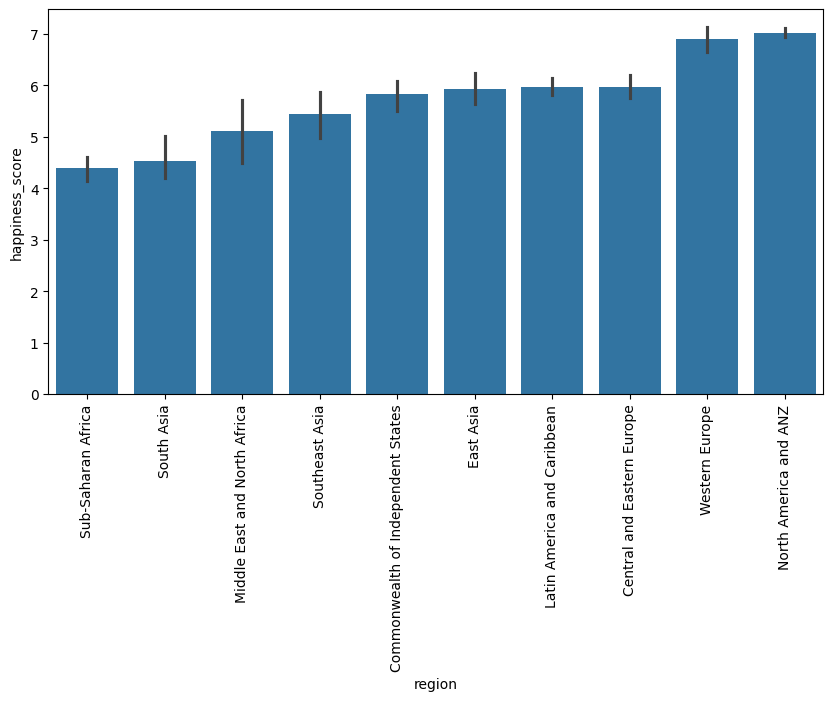

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

region_mean = hp_df.groupby('region')['happiness_score'].mean().sort_values()

plt.figure(figsize=(10,5))
sns.barplot(x='region', y='happiness_score', data=hp_df,
            order=region_mean.index)
plt.xticks(rotation=90)
plt.show()

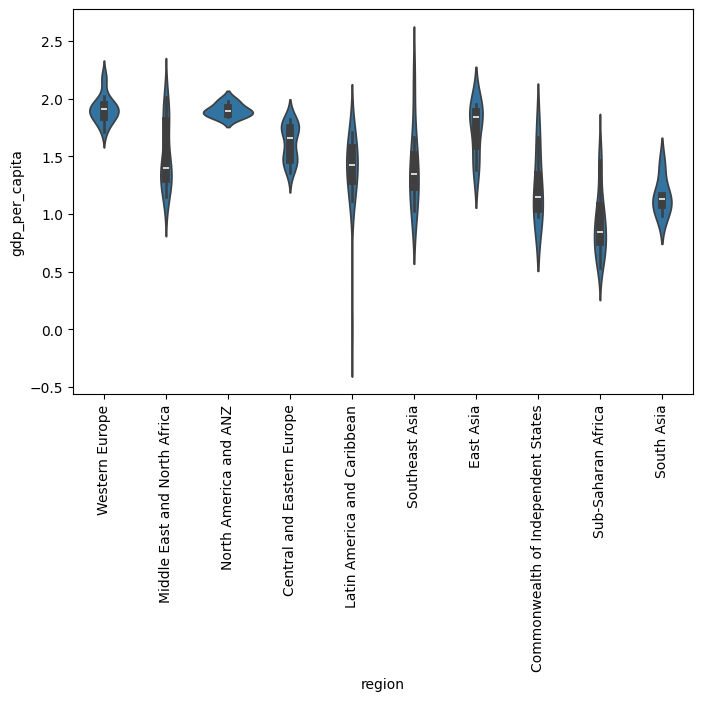

In [40]:
plt.figure(figsize=(8,5))
sns.violinplot(x='region', y='gdp_per_capita', data=hp_df)
plt.xticks(rotation=90)
plt.show()

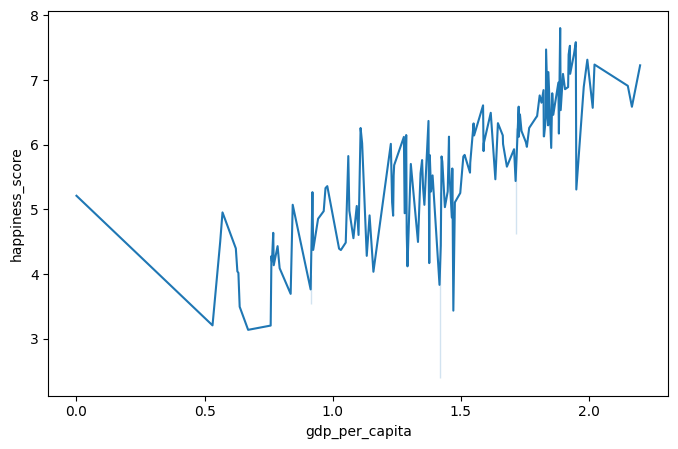

In [41]:
plt.figure(figsize=(8,5))
sns.lineplot(data=hp_df.sort_values('gdp_per_capita'),
             x='gdp_per_capita', y='happiness_score')
plt.show()

In [42]:
hp_df_lt = hp_df[hp_df.gdp_per_capita < 0.5]
display(hp_df_lt)
hp_df_lt.shape

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
87,Venezuela,Latin America and Caribbean,5.211,0.0,1.257,0.341,0.369,0.205,0.084


(1, 9)

In [43]:
import numpy as np
from scipy.stats import iqr

hp_Q1 = np.percentile(hp_df.gdp_per_capita, 25)
hp_Q3 = np.percentile(hp_df.gdp_per_capita, 75)

iqr_value = iqr(hp_df.gdp_per_capita)
print(iqr_value)

lower_bound = hp_Q1 - 1.5 * iqr_value
upper_bound = hp_Q3 + 1.5 * iqr_value
print(f'정상치 범위: {lower_bound} ~ {upper_bound}')

0.6975
정상치 범위: 0.05424999999999991 ~ 2.84425


In [44]:
condition1 = hp_df.gdp_per_capita >= lower_bound
condition2 = hp_df.gdp_per_capita <= upper_bound
condition = condition1 & condition2

hp_df = hp_df[condition]
hp_df

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
131,Botswana,Sub-Saharan Africa,3.435,1.471,1.041,0.087,0.480,0.021,0.071
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051


In [45]:
hp_df.isna().sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

In [46]:
hp_df_lt = hp_df[hp_df.gdp_per_capita < 0.5]
display(hp_df_lt)
hp_df_lt.shape

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption


(0, 9)

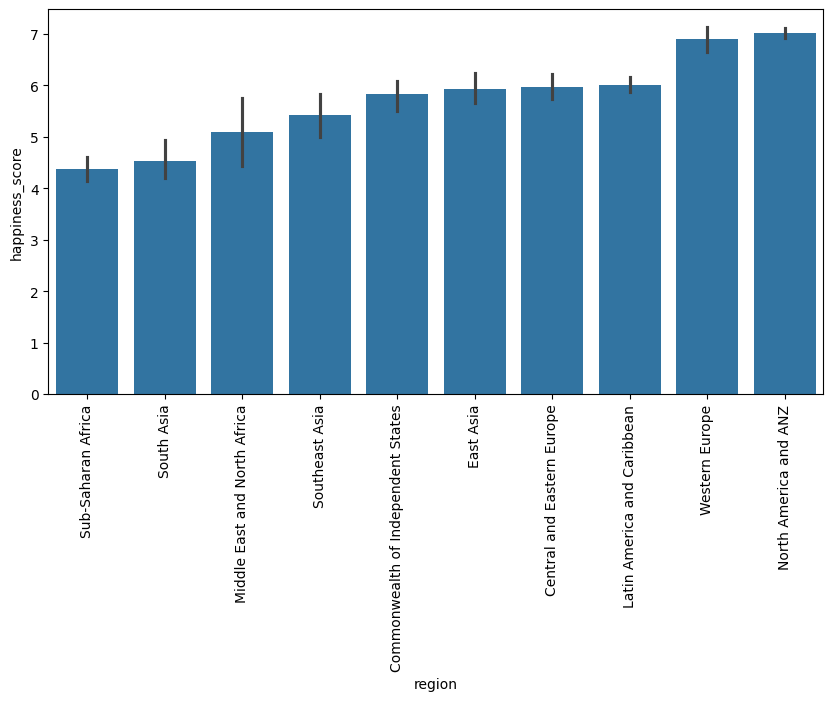

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

region_mean = hp_df.groupby('region')['happiness_score'].mean().sort_values()

plt.figure(figsize=(10,5))
sns.barplot(x='region', y='happiness_score', data=hp_df,
            order=region_mean.index)
plt.xticks(rotation=90)
plt.show()

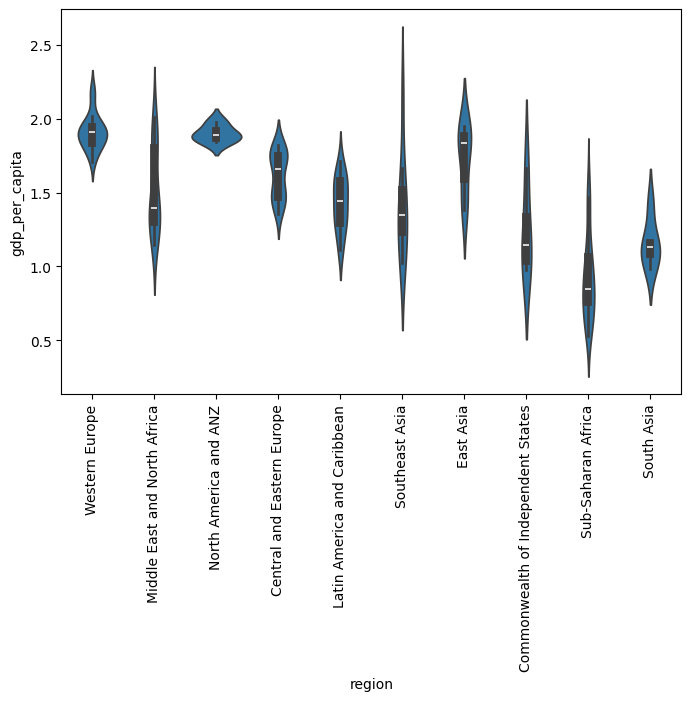

In [48]:
plt.figure(figsize=(8,5))
sns.violinplot(x='region', y='gdp_per_capita', data=hp_df)
plt.xticks(rotation=90)
plt.show()

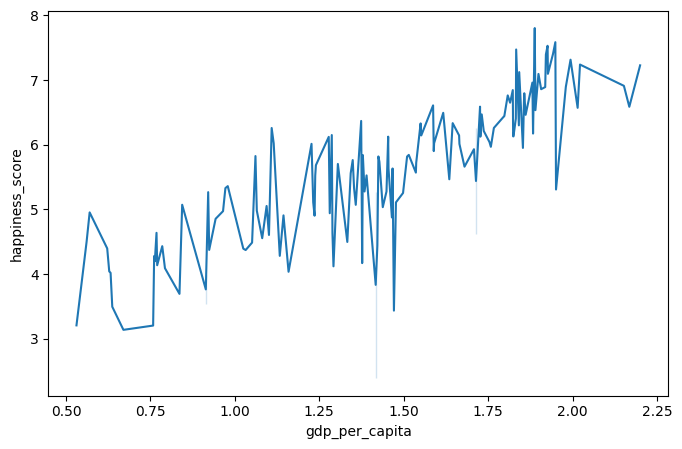

In [50]:
plt.figure(figsize=(8,5))
sns.lineplot(data=hp_df.sort_values('gdp_per_capita'),
             x='gdp_per_capita', y='happiness_score')
plt.show()

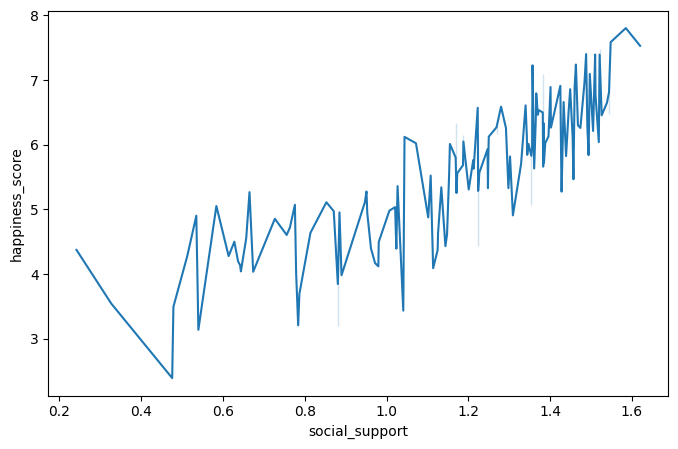

In [52]:
plt.figure(figsize=(8,5))
sns.lineplot(data=hp_df, x='social_support', y='happiness_score')
plt.show()

#### 🌍 2023년도 GDP 및 사회적 지지(social support)에 따른 행복지수 보고서  

- **GDP가 높은 국가일수록** 평균 행복 점수가 높게 나타났으며, 전반적으로 행복 수준의 변동폭이 작았다.  
  경제적 안정이 확보된 사회에서는 대체로 국민들이 비슷한 수준의 삶의 만족도를 보였다.  

- **사회적 지지(social support)** 가 높은 국가에서는 행복 점수가 전반적으로 높고, 분산이 작았다.  
  신뢰와 관계적 안정이 확보된 사회일수록 구성원 간 행복 격차가 줄어드는 경향이 있었다.  

- 반대로 **GDP나 사회적 지지 수준이 낮은 국가**에서는 행복 점수의 평균이 낮고, 변동성도 컸다.  
  이는 경제적 어려움이나 사회적 고립이 개인의 행복에 부정적인 영향을 미친다는 점을 보여준다.  

📌 **요약**  
> 경제적 풍요(GDP)는 행복의 기반을 제공하고,  
> 사회적 지지(Social support)는 행복의 균형과 안정성을 높인다.  
> 두 요인이 함께 높을수록 국민들의 행복은 고르게 유지되며,  
> 둘 중 하나라도 낮으면 행복 수준의 불균형이 커지는 경향을 보인다.